In [1]:
from pynq import Overlay

overlay = Overlay('./lab_3.bit')
# overlay?

In [2]:
import pynq.lib.dma

top_func = overlay.lab_3_0
dma = overlay.axi_dma_0

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np 

def plot_to_notebook(time_sec, in_signal, n_samples, out_signal=None):
    plt.figure()
    plt.subplot(1,1,1)
    plt.xlabel('Time (usec)')
    plt.grid()
    plt.plot(time_sec[:n_samples]*1e6, in_signal[:n_samples], 'y-', label='input signal')
    if out_signal is not None:
        plt.plot(time_sec[:n_samples]*1e6, out_signal[:n_samples], 'g-', linewidth=2, label='Boxcar (Moving Average) Filter Output')

    plt.legend()

In [4]:
from random import randint

def triangle(length, amplitude):
     section = length // 4
     for direction in (1, -1):
         for i in range(section):
             yield i * (amplitude / section) * direction
         for i in range(section):
             yield (amplitude - (i * (amplitude / section))) * direction

input_ = list(triangle(1000, 5))
input_ = [100*x + randint(0, 50) for x in input_]

print(input_)

print(f"Length of Input: {len(input_)}")

[1.0, 6.0, 20.0, 25.0, 15.0, 44.0, 43.0, 55.0, 61.0, 33.0, 49.0, 49.0, 38.0, 30.0, 29.000000000000004, 54.0, 76.0, 70.0, 80.0, 69.0, 86.0, 65.0, 57.0, 52.0, 74.0, 75.0, 65.0, 74.0, 104.0, 82.0, 94.0, 87.0, 66.0, 95.0, 112.0, 74.0, 83.0, 77.0, 103.0, 127.0, 127.0, 132.0, 91.0, 115.0, 94.0, 107.0, 96.0, 144.0, 96.0, 134.0, 134.0, 152.0, 125.0, 124.0, 135.0, 148.0, 128.0, 114.00000000000001, 152.0, 123.0, 130.0, 170.0, 128.0, 143.0, 138.0, 131.0, 142.0, 154.0, 151.0, 163.0, 167.0, 178.0, 180.0, 186.0, 180.0, 195.0, 161.0, 176.0, 202.0, 201.0, 175.0, 167.0, 183.0, 170.0, 214.0, 182.0, 173.0, 200.0, 205.0, 180.0, 187.0, 219.0, 220.0, 236.0, 204.0, 193.0, 194.0, 232.0, 205.0, 239.0, 233.0, 214.0, 211.0, 235.0, 227.0, 223.0, 237.0, 232.0, 257.0, 266.0, 251.00000000000003, 235.00000000000003, 228.00000000000003, 270.0, 240.00000000000003, 277.0, 253.99999999999997, 262.0, 278.0, 246.0, 279.0, 244.0, 257.0, 282.0, 291.0, 264.0, 294.0, 265.0, 285.0, 278.0, 307.0, 271.0, 283.0, 281.0, 307.0, 273.

<IPython.core.display.Javascript object>


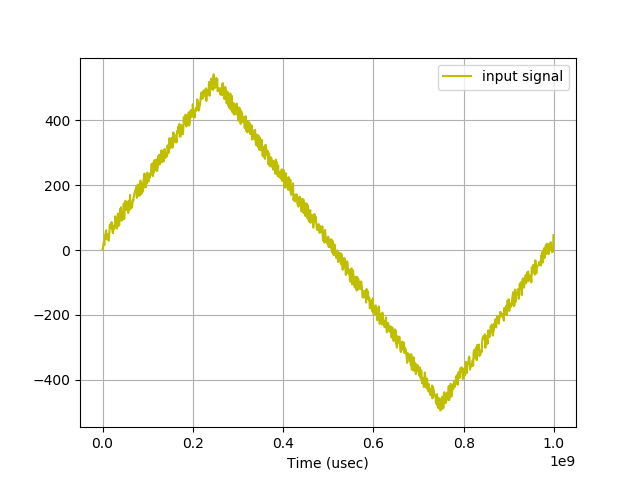

In [5]:
num_samples = len(input_)
T = num_samples
t = np.linspace(0, T, num_samples, endpoint=False)
plot_to_notebook(t, input_, num_samples)

In [6]:
from pynq import allocate
import numpy as np

in_buffer = allocate(shape=(1000,), dtype=np.uint32)
out_buffer = allocate(shape=(1000,), dtype=np.uint32)

for idx, ele in enumerate(input_):
    in_buffer[idx] = ele

print(in_buffer) 

[         1          6         20         25         15         44
         43         55         61         33         49         49
         38         30         29         54         76         70
         80         69         86         65         57         52
         74         75         65         74        104         82
         94         87         66         95        112         74
         83         77        103        127        127        132
         91        115         94        107         96        144
         96        134        134        152        125        124
        135        148        128        114        152        123
        130        170        128        143        138        131
        142        154        151        163        167        178
        180        186        180        195        161        176
        202        201        175        167        183        170
        214        182        173        200        205       

In [7]:
dma.sendchannel.transfer(in_buffer)
dma.recvchannel.transfer(out_buffer)
# dma.sendchannel.wait()
# dma.recvchannel.wait()

out_buffer

PynqBuffer([         0,          1,          5,         10,         13,
                    22,         29,         36,         43,         47,
                    48,         49,         46,         39,         39,
                    40,         45,         51,         61,         69,
                    76,         74,         71,         65,         66,
                    64,         64,         68,         78,         80,
                    83,         88,         86,         84,         90,
                    86,         86,         88,         89,         92,
                   103,        113,        116,        118,        111,
                   107,        100,        111,        107,        115,
                   120,        132,        128,        133,        134,
                   136,        132,        129,        135,        133,
                   129,        137,        140,        138,        141,
                   142,        136,        141,        143,     

In [8]:
def uint_to_int(num, bits):
    """compute the 2's complement of int value val"""
    if (num & (1 << (bits - 1))) != 0: # if sign bit is set e.g., 8bit: 128-255
        num = num - (1 << bits)        # compute negative value
    return num                         # return positive value as is

output = list()
for idx, ele in enumerate(out_buffer):
    output.append(uint_to_int(ele, 32))

print(output)

[0, 1, 5, 10, 13, 22, 29, 36, 43, 47, 48, 49, 46, 39, 39, 40, 45, 51, 61, 69, 76, 74, 71, 65, 66, 64, 64, 68, 78, 80, 83, 88, 86, 84, 90, 86, 86, 88, 89, 92, 103, 113, 116, 118, 111, 107, 100, 111, 107, 115, 120, 132, 128, 133, 134, 136, 132, 129, 135, 133, 129, 137, 140, 138, 141, 142, 136, 141, 143, 148, 155, 162, 167, 174, 178, 183, 180, 179, 182, 187, 183, 184, 185, 179, 181, 183, 184, 187, 194, 188, 189, 198, 202, 208, 213, 214, 209, 211, 205, 212, 220, 224, 220, 226, 224, 222, 226, 230, 235, 243, 248, 248, 247, 250, 244, 250, 253, 260, 262, 263, 263, 261, 260, 261, 270, 267, 277, 279, 279, 277, 285, 281, 284, 284, 289, 283, 290, 295, 301, 297, 302, 299, 296, 291, 299, 301, 302, 304, 315, 315, 316, 325, 333, 330, 335, 336, 336, 341, 343, 345, 349, 346, 342, 342, 337, 343, 348, 353, 361, 369, 374, 372, 369, 363, 364, 364, 370, 371, 373, 371, 376, 380, 388, 395, 403, 398, 393, 391, 396, 396, 397, 406, 405, 402, 399, 408, 409, 418, 421, 424, 427, 426, 423, 427, 425, 421, 422, 427, 42

<IPython.core.display.Javascript object>


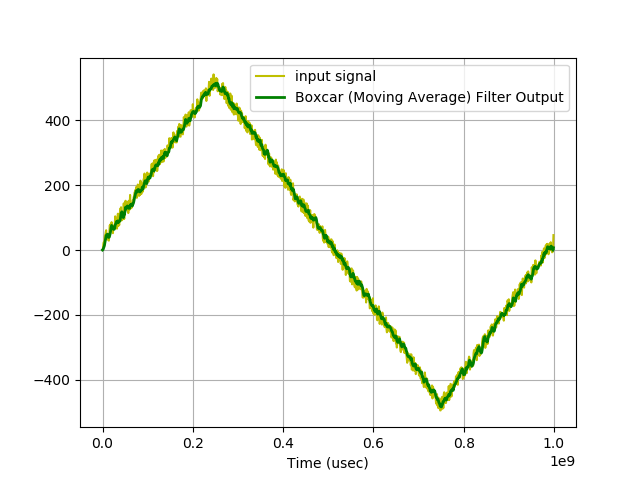

In [9]:
plot_to_notebook(t, input_, num_samples, output)

In [10]:
# Testing IP output
shift_reg = [0, 0, 0, 0, 0]
ground_truth = list()

for x in range(len(input_)):
    acc  = 0.0
    for i in reversed(range(5)):
        if i != 0:
            shift_reg[i] = shift_reg[i-1]
            
    # The IP is receiving integer inputs, 
    # so should our ground_truth block
    shift_reg[0] = int(input_[x])

    for i in range(5):
        acc += shift_reg[i]

    ground_truth.append(int(acc/5))

print(ground_truth)

[0, 1, 5, 10, 13, 22, 29, 36, 43, 47, 48, 49, 46, 39, 39, 40, 45, 51, 61, 69, 76, 74, 71, 65, 66, 64, 64, 68, 78, 80, 83, 88, 86, 84, 90, 86, 86, 88, 89, 92, 103, 113, 116, 118, 111, 107, 100, 111, 107, 115, 120, 132, 128, 133, 134, 136, 132, 129, 135, 133, 129, 137, 140, 138, 141, 142, 136, 141, 143, 148, 155, 162, 167, 174, 178, 183, 180, 179, 182, 187, 183, 184, 185, 179, 181, 183, 184, 187, 194, 188, 189, 198, 202, 208, 213, 214, 209, 211, 205, 212, 220, 224, 220, 226, 224, 222, 226, 230, 235, 243, 248, 248, 247, 250, 244, 250, 253, 260, 262, 263, 263, 261, 260, 261, 270, 267, 277, 279, 279, 277, 285, 281, 284, 284, 289, 283, 290, 295, 301, 297, 302, 299, 296, 291, 299, 301, 302, 304, 315, 315, 316, 325, 333, 330, 335, 336, 336, 341, 343, 345, 349, 346, 342, 342, 337, 343, 348, 353, 361, 369, 374, 372, 369, 363, 364, 364, 370, 371, 373, 371, 376, 380, 388, 395, 403, 398, 393, 391, 396, 396, 397, 406, 405, 402, 399, 408, 409, 418, 421, 424, 427, 426, 423, 427, 425, 421, 422, 427, 42

In [11]:
def compare_lists(ground_truth, output):
    if len(ground_truth) != len(output):
        print("Lists are of uneven length!")
    
    error = 0
    
    for x in range(len(ground_truth)):
        if ground_truth[x] != output[x]:
            error += 1
            print(f"Error at index {x} - ground_truth: {ground_truth[x]} != output: {output[x]}")
    
    if(error == 0):
        print("Both lists are equal!")

compare_lists(ground_truth, output)       

Both lists are equal!
